<a href="https://colab.research.google.com/github/T-Dayaram/Python_Projects_DATA201/blob/main/TDayaram_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project #2; Analyst NYPD Arrest Data
#Pick neighborhood or district as initial comparison point
#Compare my choice to anothe point
#Include descriptive statistics
#Include one cleaning task, one visualization and a summary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NYPD_Arrest = pd.read_csv("https://raw.githubusercontent.com/T-Dayaram/Python/refs/heads/main/NYPD_Arrest_Data_(Year_to_Date)_20251203.csv")
NYPD_Arrest.head()
#Our earliest arrest date is January 2nd, 2025

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
0,298760433,01/02/2025,782,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,Q,115,3,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,299030225,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,28,0,25-44,M,BLACK,997439,233857,40.808558,-73.952357,POINT (-73.952357 40.808558)
2,299127494,01/08/2025,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,81,1,(null),(null),WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299188536,01/09/2025,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,7,2,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
4,299533742,01/16/2025,155,RAPE 2,104.0,RAPE,PL 1303001,F,K,81,0,18-24,F,BLACK,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)


In [4]:
NYPD_Arrest.tail()
#Our most recent arrest date is September 30th, 2025

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
212481,313721479,09/30/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,M,14,0,25-44,M,BLACK,989384,210867,40.745465,-73.981470,POINT (-73.98147 40.745465)
212482,313591851,09/28/2025,117,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648706,-73.905129,POINT (-73.905129 40.648706)
212483,313631369,09/29/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0,25-44,F,BLACK HISPANIC,1024708,266922,40.899229,-73.853653,POINT (-73.853653 40.899229)
212484,313655670,09/29/2025,115,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,110,0,25-44,F,WHITE HISPANIC,1014130,211057,40.745939,-73.892164,POINT (-73.892164 40.745939)
212485,313589485,09/28/2025,661,"LEWDNESS,PUBLIC",361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 24500BI,M,K,75,0,45-64,M,BLACK,1017119,183909,40.671413,-73.881510,POINT (-73.88151 40.671413)


In [5]:
NYPD_Arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212486 entries, 0 to 212485
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         212486 non-null  int64  
 1   ARREST_DATE        212486 non-null  object 
 2   PD_CD              212486 non-null  int64  
 3   PD_DESC            212486 non-null  object 
 4   KY_CD              212470 non-null  float64
 5   OFNS_DESC          212486 non-null  object 
 6   LAW_CODE           212486 non-null  object 
 7   LAW_CAT_CD         211482 non-null  object 
 8   ARREST_BORO        212486 non-null  object 
 9   ARREST_PRECINCT    212486 non-null  int64  
 10  JURISDICTION_CODE  212486 non-null  int64  
 11  AGE_GROUP          212486 non-null  object 
 12  PERP_SEX           212486 non-null  object 
 13  PERP_RACE          212486 non-null  object 
 14  X_COORD_CD         212486 non-null  int64  
 15  Y_COORD_CD         212486 non-null  int64  
 16  La

In [7]:
# Let's restrict the data to between the first day and last day of Summer 2025
NYPD_Arrest = NYPD_Arrest.drop(columns=['X_COORD_CD','Y_COORD_CD','Latitude','Longitude','Location'], errors='ignore')
NYPD_Arrest['ARREST_DATE'] = pd.to_datetime(NYPD_Arrest['ARREST_DATE'])
summer_2025 = (NYPD_Arrest['ARREST_DATE'] >= '2025-06-20') & (NYPD_Arrest['ARREST_DATE'] <= '2025-09-22')

NYPD_Arrest_Summer = NYPD_Arrest.loc[summer_2025].sort_values(by='ARREST_DATE')
NYPD_Arrest_Summer

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
130993,308382080,2025-06-20,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 140200X,F,M,28,0,45-64,M,BLACK
120115,308385689,2025-06-20,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,75,0,45-64,F,BLACK HISPANIC
120117,308389695,2025-06-20,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,M,14,0,(null),(null),BLACK HISPANIC
126382,308417045,2025-06-20,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,103,0,<18,M,BLACK HISPANIC
126358,308408434,2025-06-20,203,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100F,M,M,26,2,18-24,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189524,313307027,2025-09-22,113,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,67,0,25-44,M,BLACK
200167,313301314,2025-09-22,792,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,M,32,0,25-44,M,BLACK
187762,313309750,2025-09-22,106,ASSAULT POLICE/PEACE OFFICER,106.0,FELONY ASSAULT,PL 1200800,F,B,52,71,18-24,F,WHITE HISPANIC
197206,313329124,2025-09-22,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0,<18,F,WHITE HISPANIC


In [8]:
#I shall pick the 108th precinct (where LaGuardia College is located)
NYPD_Arrest_108 = NYPD_Arrest_Summer[NYPD_Arrest["ARREST_PRECINCT"]==108]
NYPD_Arrest_108

/tmp/ipython-input-1028323310.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NYPD_Arrest_108 = NYPD_Arrest_Summer[NYPD_Arrest["ARREST_PRECINCT"]==108]


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
126184,308405130,2025-06-20,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,108,0,25-44,F,WHITE HISPANIC
120308,308406715,2025-06-20,268,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,108,0,25-44,M,WHITE HISPANIC
119161,308405131,2025-06-20,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,108,0,25-44,F,WHITE HISPANIC
119714,308373721,2025-06-20,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,108,0,(null),(null),WHITE HISPANIC
131685,308405129,2025-06-20,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,Q,108,0,25-44,F,WHITE HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202651,313314807,2025-09-22,494,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654501,F,Q,108,0,25-44,M,ASIAN / PACIFIC ISLANDER
201435,313314804,2025-09-22,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,108,0,25-44,M,UNKNOWN
209074,313314805,2025-09-22,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,Q,108,0,25-44,M,UNKNOWN
186655,313307048,2025-09-22,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,Q,108,0,45-64,F,WHITE HISPANIC


<Axes: xlabel='PERP_RACE'>

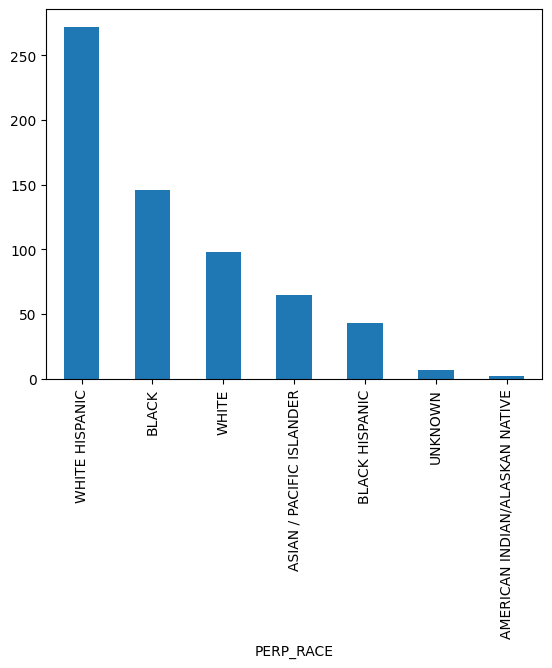

In [9]:
#We are going to look at the race of the people arrested
NYPD_Arrest_108['PERP_RACE'].value_counts().plot(kind='bar')

<Axes: ylabel='OFNS_DESC'>

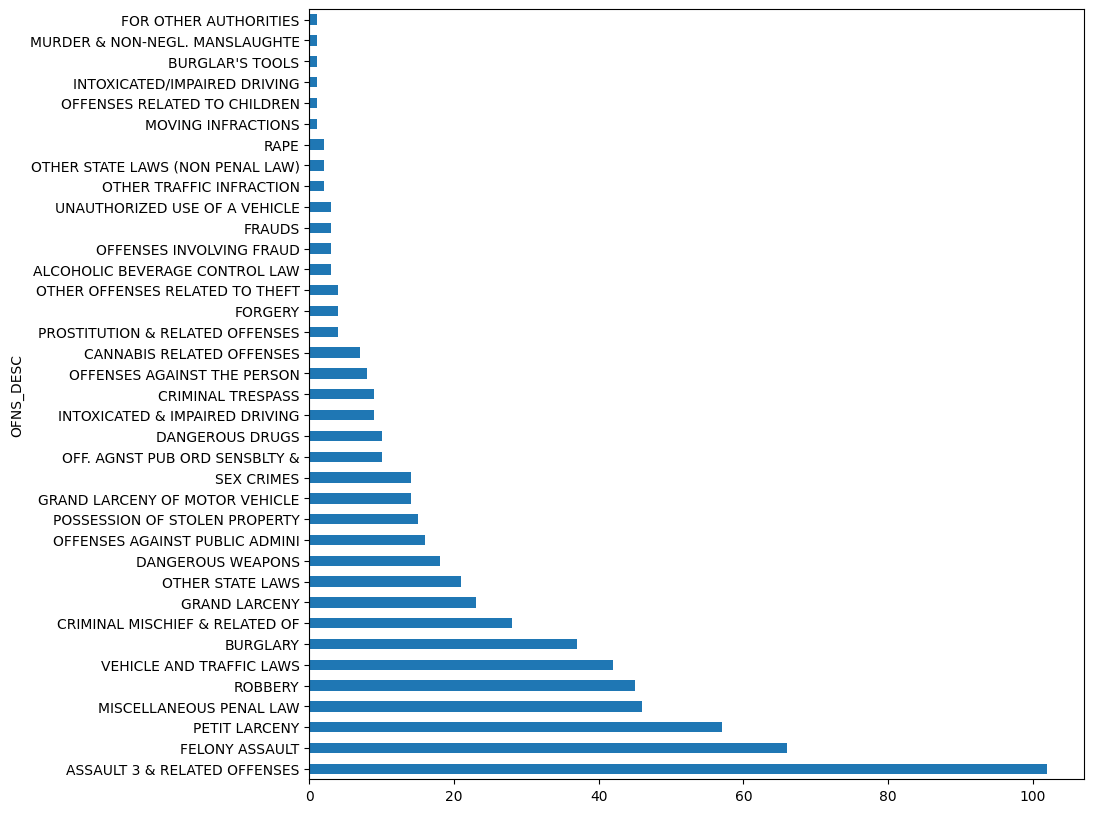

In [10]:
#Let's break this down by the types of offenses
NYPD_Arrest_108['OFNS_DESC'].value_counts().plot(kind='barh', figsize=(10,10))

<Axes: xlabel='PERP_RACE'>

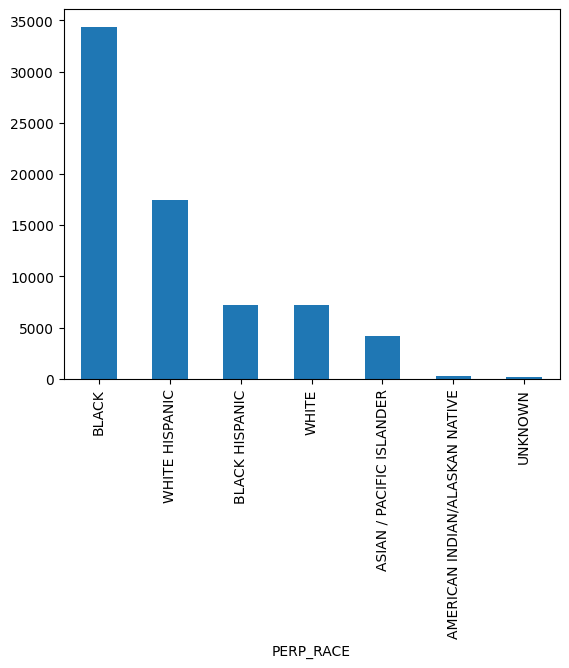

In [11]:
#For comparison, this is the arrests across the same Summer arranged by race
NYPD_Arrest_Summer['PERP_RACE'].value_counts().plot(kind='bar')

In [12]:
#We have an idea of the overall city. But I want to see the arrests across all precincts
NYPD_Arrest_Precincts = NYPD_Arrest.groupby('ARREST_PRECINCT')['PERP_RACE'].value_counts()
NYPD_Arrest_Precincts

ARREST_PRECINCT  PERP_RACE                     
1                BLACK                             1820
                 WHITE                              616
                 WHITE HISPANIC                     600
                 BLACK HISPANIC                     226
                 ASIAN / PACIFIC ISLANDER           199
                                                   ... 
123              BLACK                              101
                 ASIAN / PACIFIC ISLANDER            38
                 BLACK HISPANIC                      21
                 UNKNOWN                              5
                 AMERICAN INDIAN/ALASKAN NATIVE       3
Name: count, Length: 540, dtype: int64

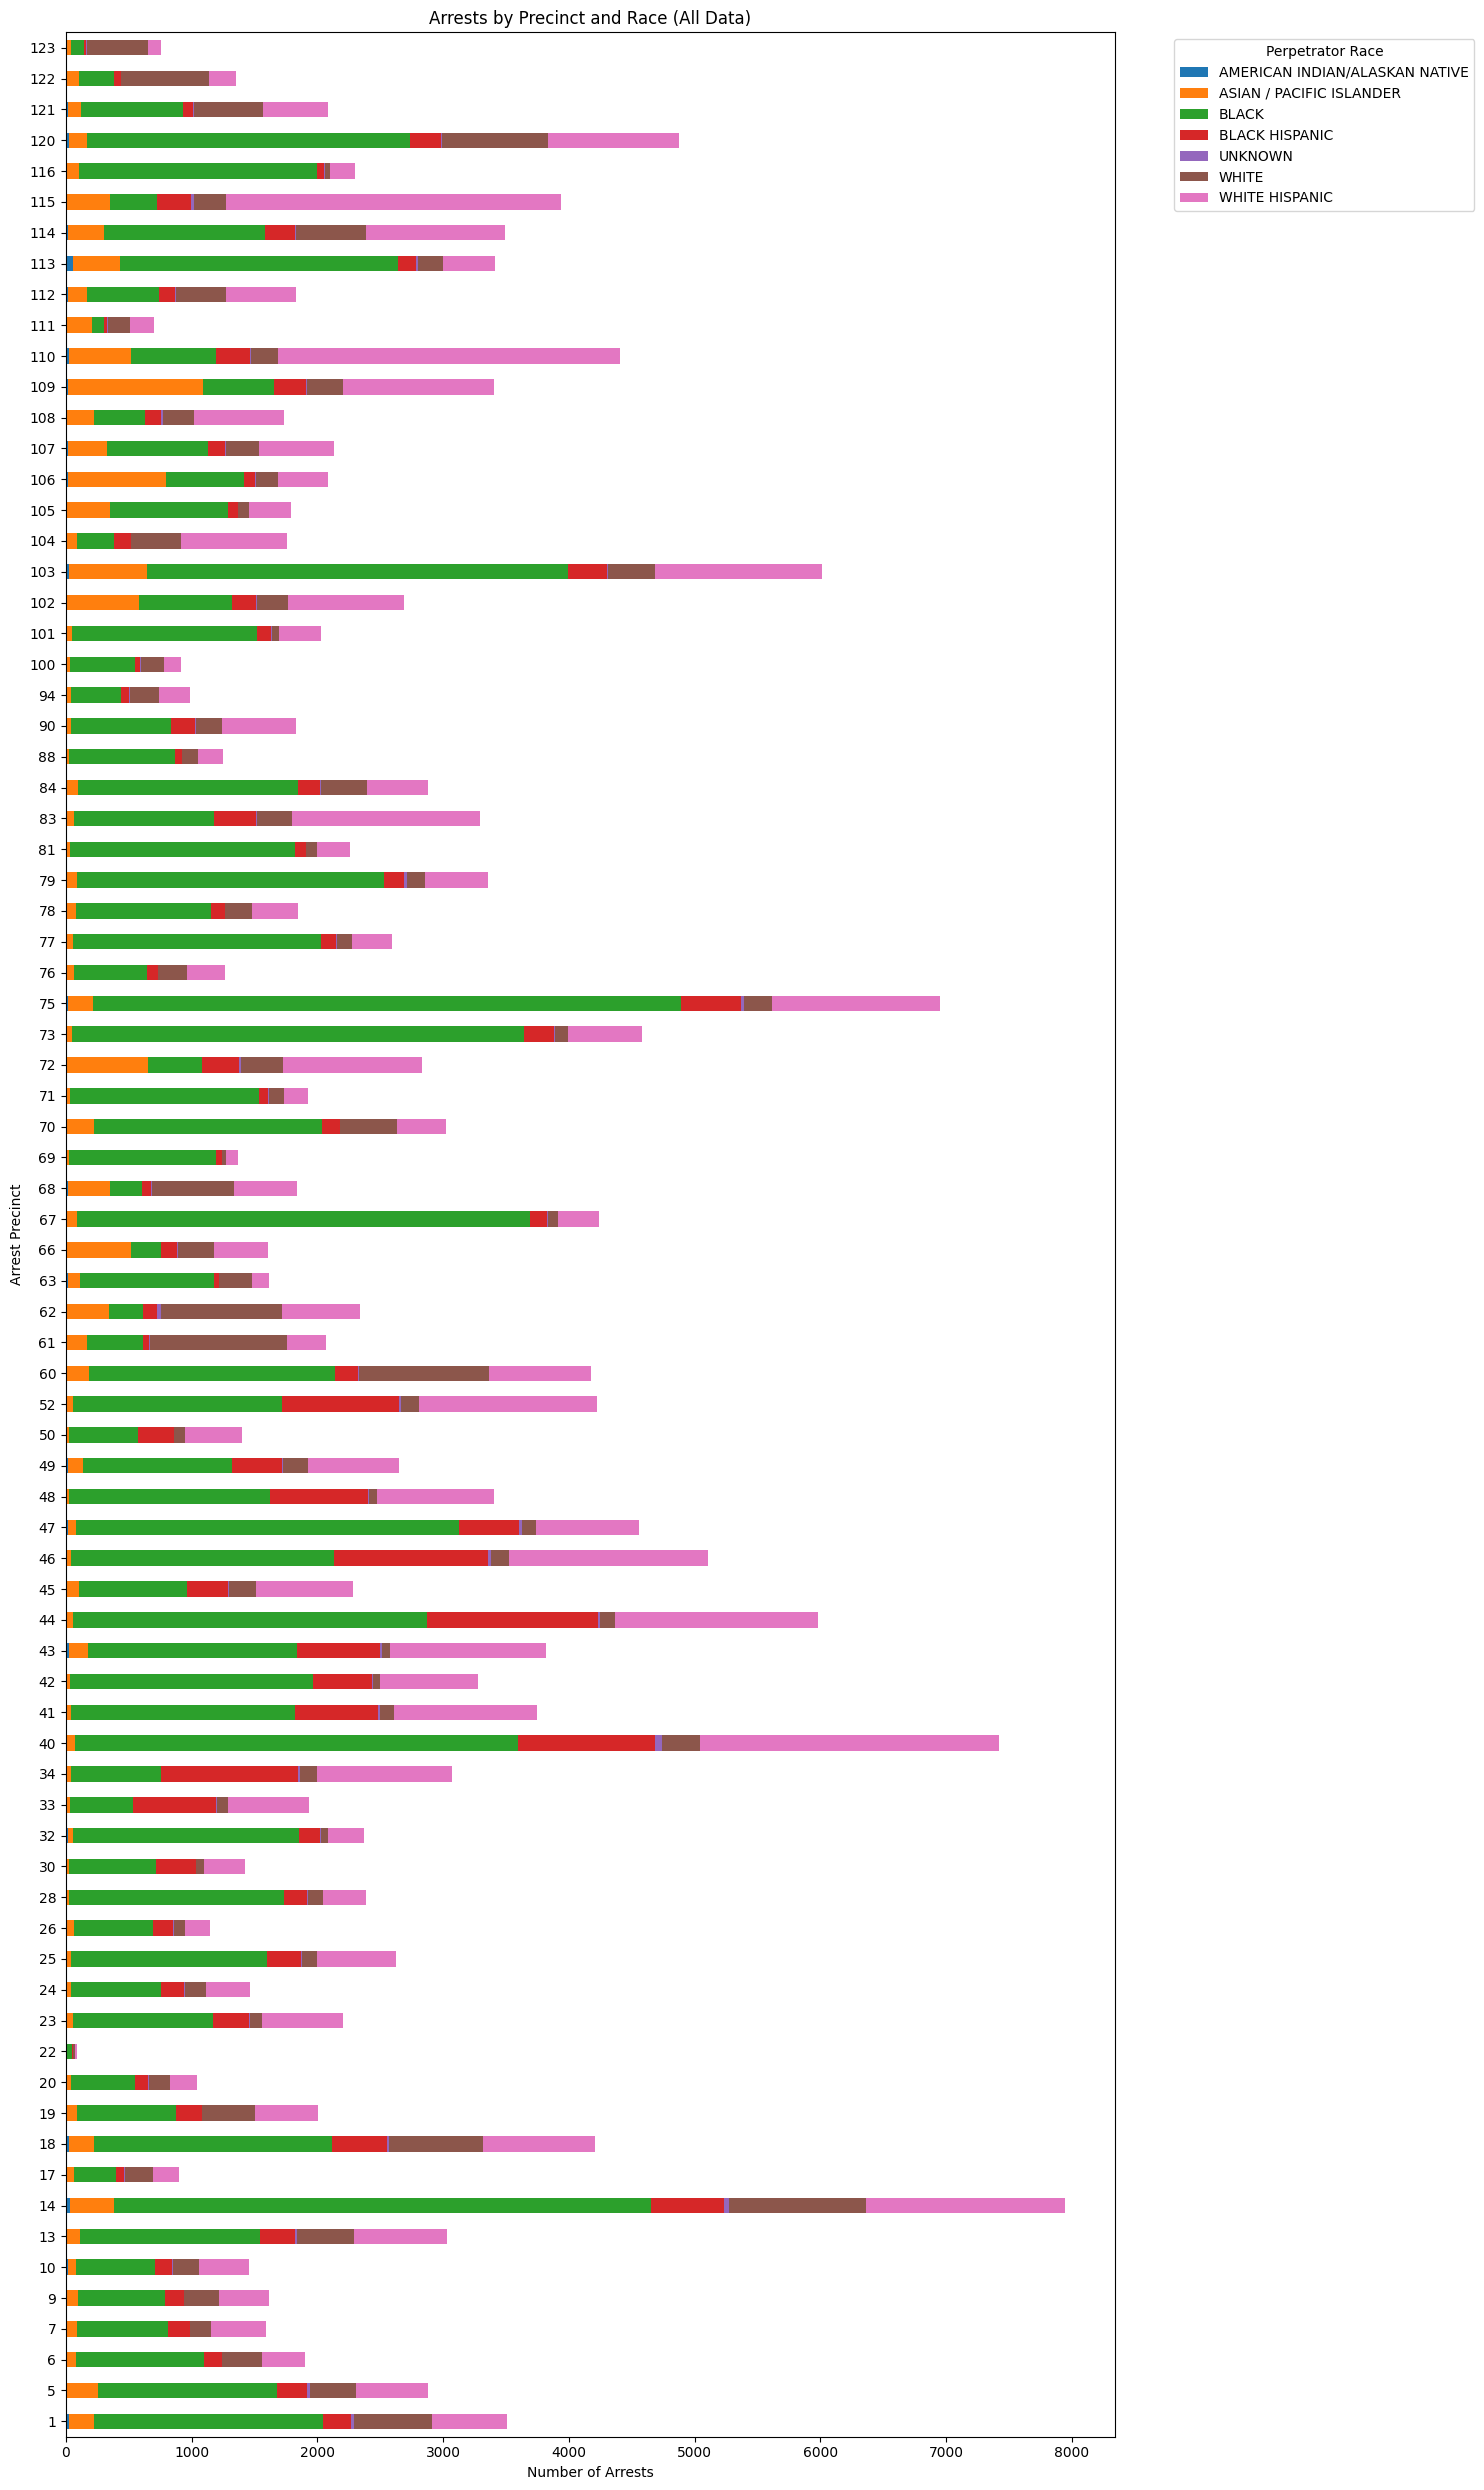

In [13]:
#We can make a much better visual than this hard-to-follow mess
import matplotlib.pyplot as plt

# Unstack the MultiIndex Series to get 'PERP_RACE' as columns for stacking
precinct_race_counts_df = NYPD_Arrest_Precincts.unstack(level='PERP_RACE')

# Plot the unstacked DataFrame as a stacked horizontal bar chart
precinct_race_counts_df.plot.barh(figsize=(15, 25), stacked=True)
plt.title('Arrests by Precinct and Race (All Data)')
plt.xlabel('Number of Arrests')
plt.ylabel('Arrest Precinct')
plt.legend(title='Perpetrator Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [14]:
#We can make a much better visual than this hard-to-follow mess
district_arrests = NYPD_Arrest_Precincts.unstack(level='PERP_RACE')
district_arrests.style.background_gradient(axis=0, cmap='RdBu')

PERP_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC
ARREST_PRECINCT,,,,,,,
1,24.000000,199.000000,1820.000000,226.000000,25.000000,616.000000,600.000000
5,5.000000,249.000000,1426.000000,241.000000,19.000000,365.000000,575.000000
6,9.000000,75.000000,1015.000000,141.000000,3.000000,319.000000,343.000000
7,4.000000,83.000000,724.000000,173.000000,5.000000,168.000000,436.000000
9,2.000000,92.000000,698.000000,145.000000,1.000000,277.000000,398.000000
10,15.000000,63.000000,630.000000,138.000000,2.000000,210.000000,398.000000
13,7.000000,104.000000,1435.000000,280.000000,14.000000,451.000000,738.000000
14,29.000000,350.000000,4275.000000,580.000000,36.000000,1094.000000,1583.000000
17,2.000000,61.000000,332.000000,66.000000,8.000000,220.000000,210.000000


# Summary

This table can always be expanded upon. We have an overview of the race of arrests for this neighborhood but I would also like to add a demographic breakdown to the districts. I even wanted to make a line plot detailing how many arrests were made across each day. I have presented a fair "first page" assessment of the arrests for summer of 2025.